## RETRIEVING LIPAS SPORTS FACILITIES

This code gets the point features fron LIPAS database and keeps the ones inside the Helsinki Metropolitan Area.

In [ ]:
# importing modules
import geopandas as gpd
import pandas as pd
import pyproj
import os.path 
import requests
import geojson
import shapely
import matplotlib.pyplot as plt
from pyproj import CRS

In [6]:
#retrieve data as wfs
r = requests.get("""http://lipas.cc.jyu.fi/geoserver/lipas/ows?service=wfs&version=2.0.0&request=GetFeature&typeNames=lipas:lipas_kaikki_pisteet&bbox=361500.0001438780454919,6665250.0001345984637737,403750.0001343561452813,6698000.0001281434670091,EPSG:3067&outputFormat=json""")
lipas_pisteet = gpd.GeoDataFrame.from_features(geojson.loads(r.content))
lipas_pisteet.crs = "epsg:3067"


#get a shapefile of municipalities
municip = gpd.read_file(r"kunnat_2020_milj.shp",
                      crs= CRS.from_epsg(3067).to_wkt())

#choose the study area municipalities
hma = municip.loc[(municip["NAMEFIN"] == "Espoo") | (municip["NAMEFIN"] == "Helsinki") |
                (municip["NAMEFIN"] == "Vantaa") | (municip["NAMEFIN"] == "Kauniainen")]

#retrieve the sports facilities in Helsinki Metropolitan area
lipas_data = gpd.overlay(lipas_pisteet, hma, how="intersection")


# Removing unnecessary attributes from lipas_data
lipas_data = lipas_data[["geometry","id","nimi_fi","tyyppi_nimi_fi"]]
    
lipas_data = lipas_data.reset_index()

for i in range(len(lipas_data)):

    lipas_data.loc[i, "nimi"] = lipas_data["nimi_fi"][i].split("/")[0]


lipas_data = lipas_data[["nimi_fi", "tyyppi_nimi_fi", "geometry", "nimi"]]

lipas_data

,nimi_fi,tyyppi_nimi_fi,geometry,nimi
0,Laajasalon peruskoulu (ala-aste) / Koripalloke...,Koripallokenttä,POINT (392042.022 6672717.342),Laajasalon peruskoulu (ala-aste)
1,Fressi24 Arabia / Kuntosali,Kuntosali,POINT (387397.776 6675804.536),Fressi24 Arabia
2,Pihlajiston ala-asteen koulu / Luistelukenttä,Luistelukenttä,POINT (389584.882 6678746.363),Pihlajiston ala-asteen koulu
3,Stadin ammatti- ja aikuisopisto (Sturenkatu) /...,Liikuntasali,POINT (386515.598 6674735.682),Stadin ammatti- ja aikuisopisto (Sturenkatu)
4,Puistolan liikuntahalli,Liikuntahalli,POINT (392433.582 6682758.279),Puistolan liikuntahalli
...,...,...,...,...
3935,Gallträskin ulkokuntosali,Ulkokuntoilupaikka,POINT (374473.000 6678192.000),Gallträskin ulkokuntosali
3936,Skeittipuisto,Skeitti-/rullaluistelupaikka,POINT (373708.714 6677009.878),Skeittipuisto
3937,Kasavuoren koulun liikuntasali 2,Liikuntasali,POINT (372696.192 6677605.810),Kasavuoren koulun liikuntasali 2
3938,Granhultin koulun sali,Liikuntasali,POINT (373280.706 6677733.245),Granhultin koulun sali


<AxesSubplot:>

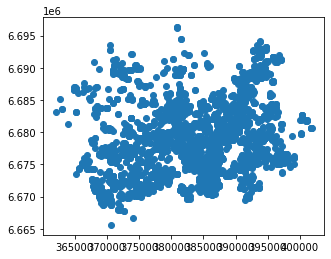

In [7]:
lipas_data.plot()

In [8]:
lipas_data.to_file("lipas.shp")